# Family Classification with Random Forests
 
 * I don't see how random forests help here. We are not interested in the classification per se, only in what we can learn from the classification rules. So in any event, we can only look at one tree at a time, and even that maybe a little too complicated. 
 
 
 * (1) Shows a few examples with WO featues alone 
     
 
 * (2) Shows a few without WO
 
 * (3) Shows an example with Phonology features alone
 
 
 * The classification is far from perfect. If we want to pursue the decision trees method, we have to develop a procedure for searching for interesting trees &mdash; in that maybe a random forest could help. 
 
 
 * In these exmples, it doesn't seem that WO separates better; Consider only the trees with 3 famileis: In [7], In [14] &mdash; only word order, In [26] &mdash; no word order and In [30] &mdash; only phonology.


In [1]:
library(rpart)
library(randomForest)
library(rpart.plot)
wals <- read.csv('wals.csv')
binwals <- read.csv('binarized-wals.csv')

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [2]:
colnames(wals) <- sub("(X[0-9]+[A-Z])(.*)","\\1",colnames(wals))
binwals$X <- NULL

# 1. Only Word Order
## Search Criteria:
 - Word Order only
 - At least 65 languages in most frequent family
 - At least count(top-family) * 0.7 languages in the second and third families

## Maximal Feature Groups that Meat These Criteria:

In [3]:
g1 = c('143A', '143E', '143F', '143G', '82A', '83A', '89A') 
g2 = c('143A', '143E', '143F', '143G', '83A', '89A')

In [4]:
chunk_wals <- function(cols,supp) {
    cols <- unlist(lapply(cols,function(f){paste('X',f,sep="")}))
    wals[rowSums(binwals[,cols]) >= length(cols),c(cols,supp)]
}

In [5]:
example1 = chunk_wals(g1,'family')
head(summary(example1$family))

Austronesian      Niger-Congo     Sino-Tibetan     Afro-Asiatic 
             135              116               97               59 
   Indo-European Trans-New Guinea 
              56               43

In [6]:
exampletree <- function(langs,wals_chunk,cp=0.01,minsplit=8) {
    dat <- wals_chunk[wals_chunk$family %in% langs,]
    dat$family <-  droplevels(dat$family)
    dat <- lapply(dat,as.factor)
    tree <- rpart(family ~ ., data = dat,control=c(minsplit=minsplit,cp=cp),method='class')
    tree
}
exampleforest <- function(langs,wals_chunk) {
    dat <- wals_chunk[wals_chunk$family %in% langs,]
    dat$family <- droplevels(dat$family)
    dat <- lapply(dat,as.factor)
    forest <- randomForest(family ~ ., data=dat, importance=TRUE)
    forest
}
#tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan'),example1)
forest1 <- exampleforest(c('Austronesian','Niger-Congo','Sino-Tibetan'),example1)

In [7]:
print(forest1)


Call:
 randomForest(formula = family ~ ., data = dat, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 28.16%
Confusion matrix:
             Austronesian Niger-Congo Sino-Tibetan class.error
Austronesian           87          39            9  0.35555556
Niger-Congo            39          74            3  0.36206897
Sino-Tibetan            4           4           89  0.08247423


In [8]:
example2 = chunk_wals(g2,'family')
head(summary(example2$family))

Austronesian      Niger-Congo     Sino-Tibetan     Afro-Asiatic 
             135              119               97               61 
   Indo-European Trans-New Guinea 
              56               43

In [9]:
forest2 <- exampleforest(c('Austronesian','Niger-Congo','Sino-Tibetan','Indo-European'),example2)
print(forest2)


Call:
 randomForest(formula = family ~ ., data = dat, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 32.92%
Confusion matrix:
              Austronesian Indo-European Niger-Congo Sino-Tibetan class.error
Austronesian            83             6          37            9   0.3851852
Indo-European           18            30           0            8   0.4642857
Niger-Congo             39             2          75            3   0.3697479
Sino-Tibetan             5             4           3           85   0.1237113


# 2. No Word Order

## Search Criteria:
 - Word Order not included
 - At least 65 languages in most frequent family
 - At least count(top-family) * 0.8 languages in the second, third and fourth families

## Maximal Feature Groups that Meat These Criteria:

In [10]:
g3 = c('112A', '116A', '26A', '33A', '69A')
g4 = c('112A', '116A', '33A', '69A')

In [11]:
example3 = chunk_wals(g3,'family')
head(summary(example3$family))

Austronesian     Sino-Tibetan      Niger-Congo     Afro-Asiatic 
              53               52               49               46 
   Indo-European Trans-New Guinea 
              40               24

In [12]:
forest3 <- exampleforest(c('Austronesian','Niger-Congo','Sino-Tibetan','Afro-Asiatic'),example3)
print(forest3)


Call:
 randomForest(formula = family ~ ., data = dat, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 36.5%
Confusion matrix:
             Afro-Asiatic Austronesian Niger-Congo Sino-Tibetan class.error
Afro-Asiatic           22            9           3           12   0.5217391
Austronesian            6           37           6            4   0.3018868
Niger-Congo             6            6          34            3   0.3061224
Sino-Tibetan            6           11           1           34   0.3461538


In [13]:
example4 = chunk_wals(g4,'family')
head(summary(example4$family))

Austronesian     Sino-Tibetan      Niger-Congo     Afro-Asiatic 
              54               54               53               47 
   Indo-European Trans-New Guinea 
              41               26

In [14]:
forest4 <- exampleforest(c('Austronesian','Niger-Congo','Sino-Tibetan','Afro-Asiatic'),example4)
print(forest4)


Call:
 randomForest(formula = family ~ ., data = dat, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 36.54%
Confusion matrix:
             Afro-Asiatic Austronesian Niger-Congo Sino-Tibetan class.error
Afro-Asiatic           18           10           6           13   0.6170213
Austronesian            4           42           6            2   0.2222222
Niger-Congo             7            9          34            3   0.3584906
Sino-Tibetan            4           11           1           38   0.2962963


# 3. Just Phonology

## Search Criteria:
 - Only Phonology Features
 - At least 40 languages in most frequent family
 - At least count(top-family) * 0.575 languages in the second and third families

## One 11-features Group that Meets These Criteria:

In [15]:
g5 = c('11A', '18A', '19A', '1A', '2A', '3A', '4A', '5A', '6A', '7A', '8A')
example5 = chunk_wals(g5,'family')
head(summary(example5$family))

Niger-Congo     Austronesian    Indo-European     Afro-Asiatic 
              54               45               31               28 
    Sino-Tibetan Trans-New Guinea 
              26               20

In [16]:
forest5 <- exampleforest(c('Austronesian','Niger-Congo','Indo-European'),example5)
print(forest5)


Call:
 randomForest(formula = family ~ ., data = dat, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 20.77%
Confusion matrix:
              Austronesian Indo-European Niger-Congo class.error
Austronesian            34             7           4   0.2444444
Indo-European            0            24           7   0.2258065
Niger-Congo              2             7          45   0.1666667


# One Family vs. Random Selection of Others

In [17]:
one_vs_others <- function(family,chunk) {
    tar <- chunk[chunk$family == family,]
    others <- chunk[chunk$family != family,]
    others <- others[sample(nrow(others),nrow(tar)),]
    others$family <- 'other'
    rbind(tar,others)
}

t <- one_vs_others('Austronesian',example1)

In [18]:
forest <- exampleforest(c('Austronesian','other'),t)

In [19]:
print(forest)


Call:
 randomForest(formula = family ~ ., data = dat, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 26.3%
Confusion matrix:
             Austronesian other class.error
Austronesian          107    28   0.2074074
other                  43    92   0.3185185


In [20]:
tree <- exampletree(c('Austronesian','other'),t)

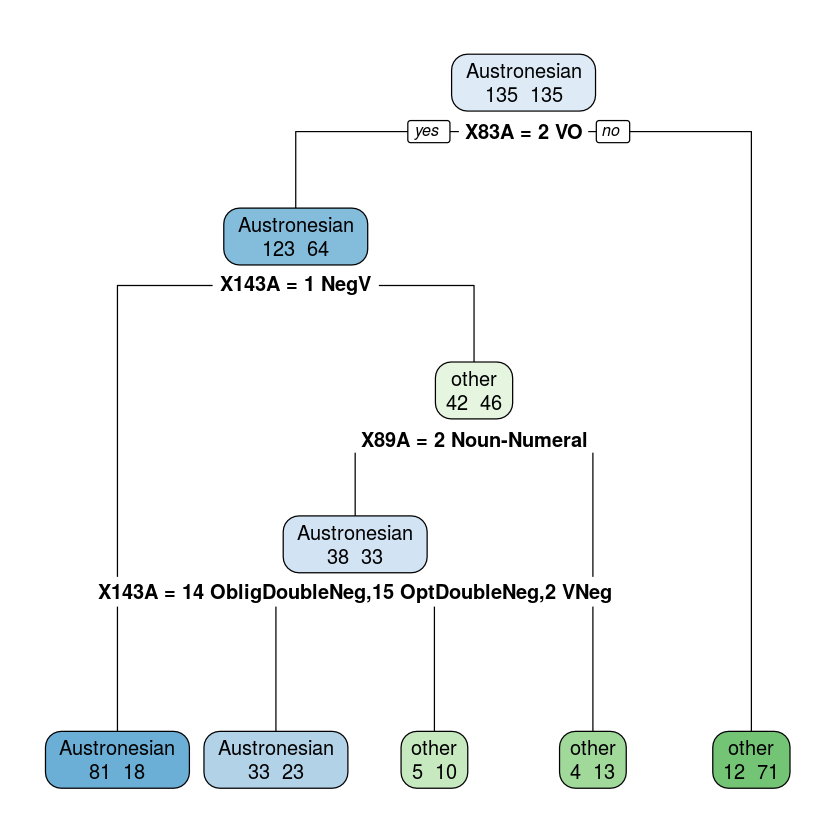

In [21]:
rpart.plot(tree,extra=1)

In [22]:
forest <-  exampleforest(c('Austronesian','other'),one_vs_others('Austronesian',example2))
print(forest)


Call:
 randomForest(formula = family ~ ., data = dat, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 23.33%
Confusion matrix:
             Austronesian other class.error
Austronesian          116    19   0.1407407
other                  44    91   0.3259259


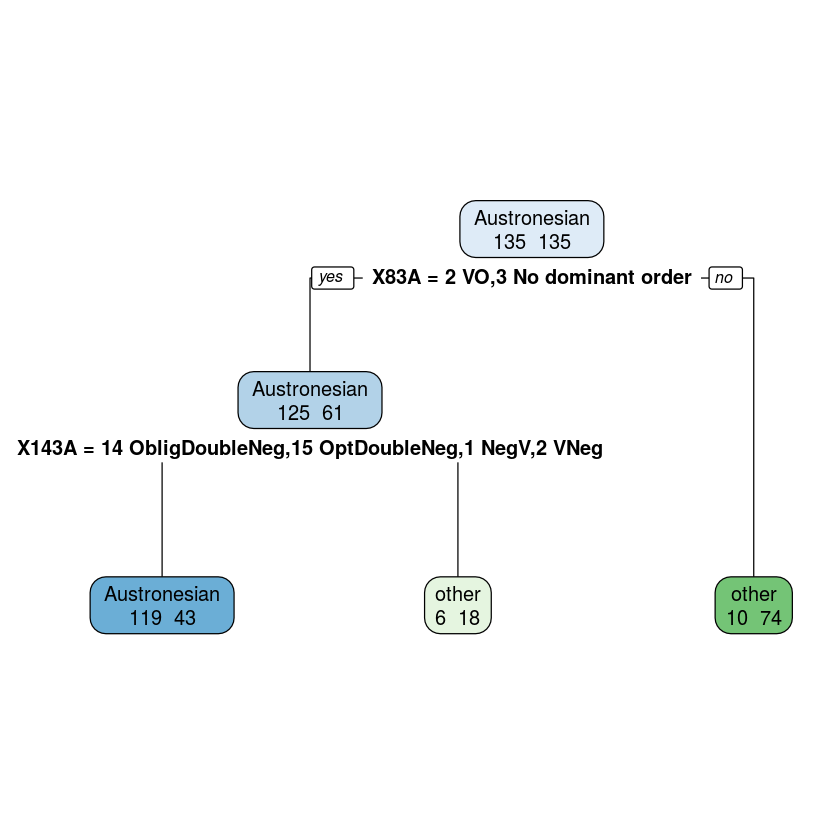

In [23]:
tree = tree <- exampletree(c('Austronesian','other'),one_vs_others('Austronesian',example2))
rpart.plot(tree,extra=1)

In [24]:
printcp(tree)


Classification tree:
rpart(formula = family ~ ., data = dat, method = "class", control = c(minsplit = minsplit, 
    cp = cp))

Variables actually used in tree construction:
[1] X143A X83A 

Root node error: 135/270 = 0.5

n= 270 

        CP nsplit rel error  xerror     xstd
1 0.474074      0   1.00000 1.10370 0.060530
2 0.088889      1   0.52593 0.54074 0.054060
3 0.010000      2   0.43704 0.50370 0.052834


In [27]:
gniger = c('143A', '81A', '89A', '97A')
chunk = chunk_wals(gniger,'family')
nigervsother = one_vs_others('Niger-Congo',chunk)
forest <- exampleforest(c('Niger-Congo','other'),nigervsother)
tree <- exampletree(c('Niger-Congo','other'),nigervsother)
print(forest)


Call:
 randomForest(formula = family ~ ., data = dat, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 12.73%
Confusion matrix:
            Niger-Congo other class.error
Niger-Congo         101     9  0.08181818
other                19    91  0.17272727


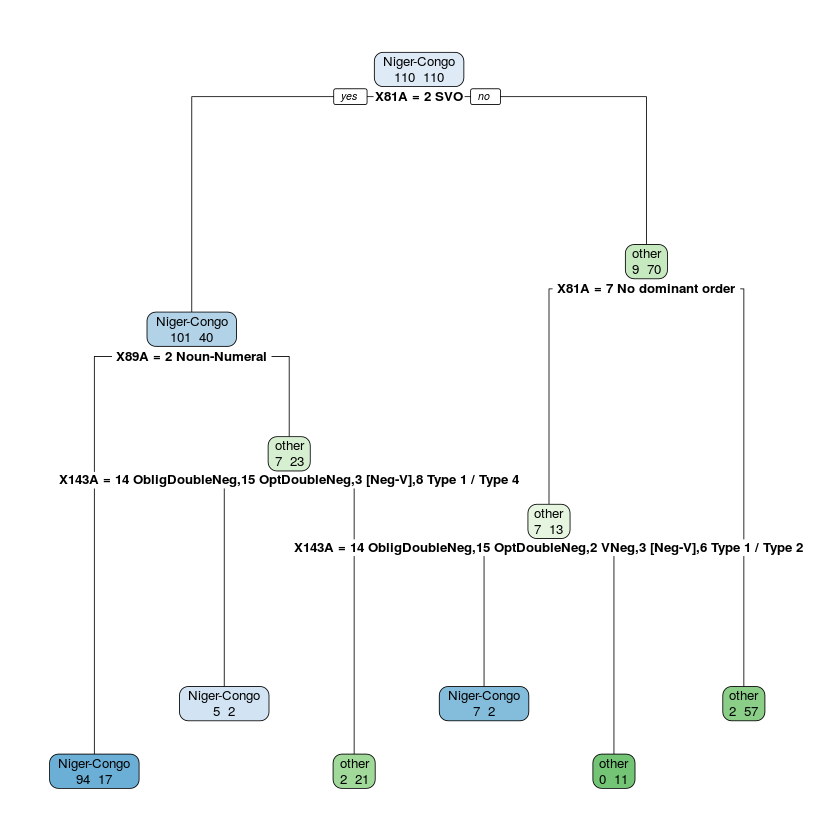

In [28]:
rpart.plot(tree,extra=1)